# Get the data and imports

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File 'sp500sub.csv' already there; not retrieving.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pmdarima as pm

In [4]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [5]:
goog = df[df['Name']=='GOOG']['Close']
aapl = df[df['Name']=='AAPL']['Close']
ibm = df[df['Name']=='IBM']['Close']
sbux = df[df['Name']=='SBUX']['Close']

In [6]:
Ntest = 30

In [10]:
# Function calculating RMSE
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

def plot_results(model, fulldata, train, test):
    """Plot the results of the model.
    
    Parameters
    ----------
    model : pmdarima.arima.ARIMA
        The fitted model.
    fulldata : pd.Series
        The full dataset.
    train : pd.Series
        The training dataset.
    test : pd.Series
        The test dataset.

    Returns
    -------
    None
        
    """
    
    params = model.get_params()
    d = params['order'][1]

    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(test.index, test, label='data')
    ax.plot(test.index, test_pred, label='test pred')
    ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red')
    ax.legend()

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(fulldata.index, fulldata, label='data')
    ax.plot(train[d:].index, train_pred, label='train pred')
    ax.plot(test.index, test_pred, label='test pred')
    ax.fill_between(test.index, confint[:, 0], confint[:, 1], alpha=0.3, color='red')
    ax.legend()

    print('RMSE ARIMA:', rmse(test_pred, test))
    print('RMSE naive:', rmse(train.iloc[-1], test))

# ARIMA with Google

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.19 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.35 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.09 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 2.165 seconds
RMSE ARIM

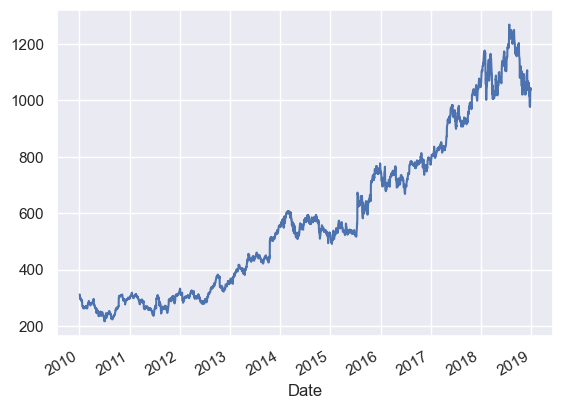

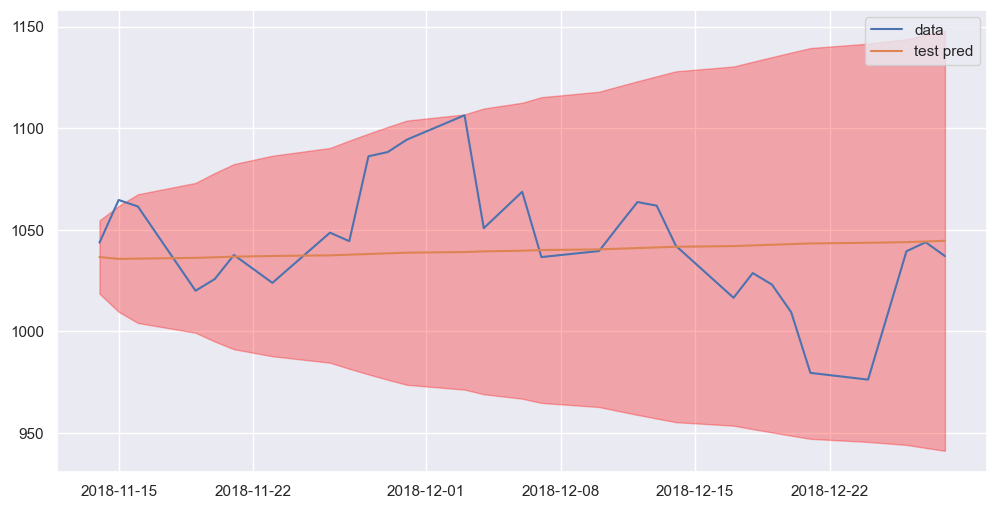

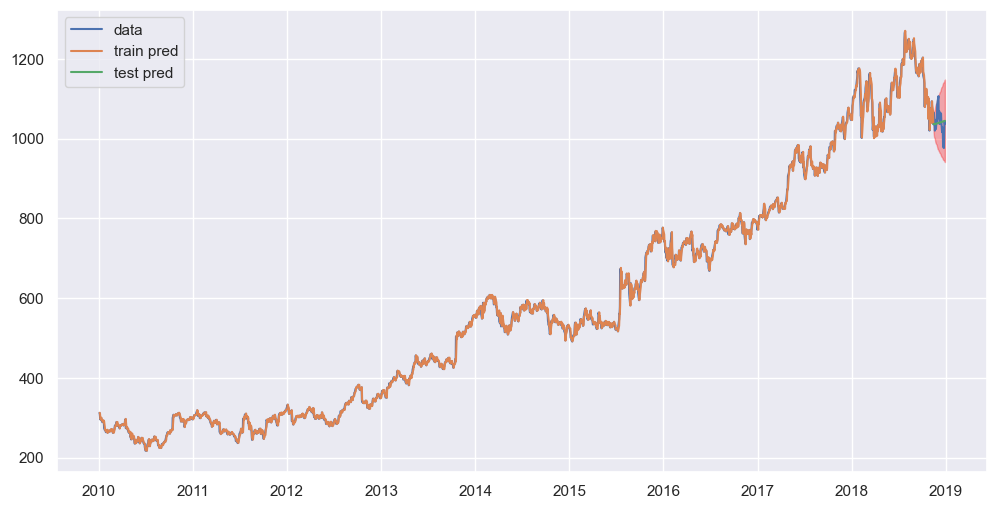

In [11]:
goog.plot()

train = goog[:-Ntest]
test = goog[-Ntest:]

model = pm.auto_arima(train, 
                      error_action='ignore', 
                      surpress_warnings=True,
                      trace=True,
                      maxiter=10,
                      seasonal=False,
                      )

model.summary()

plot_results(model, goog, train, test)

# ARIMA with Apple

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8570.296, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.329, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8574.709, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8574.392, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8577.622, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.650, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8571.332, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8572.500, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8572.527, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8574.574, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8570.852, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8570.880, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8579.289, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8572.973, Time=0.17 sec

Best model:  ARIMA(2,1,2)(0,0,0)

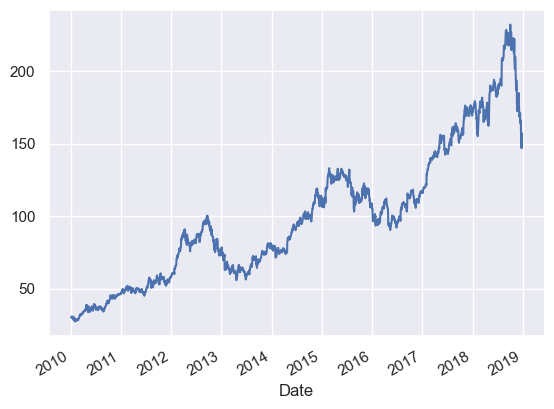

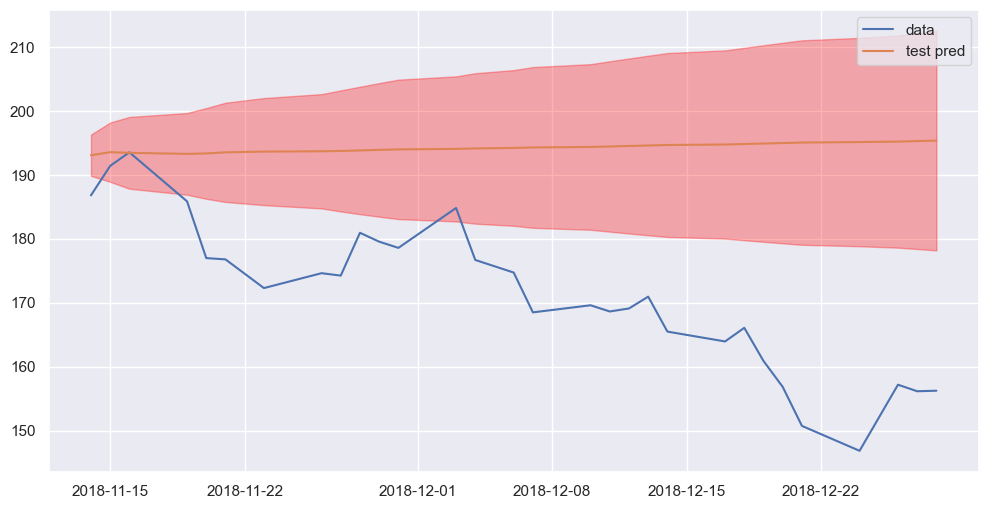

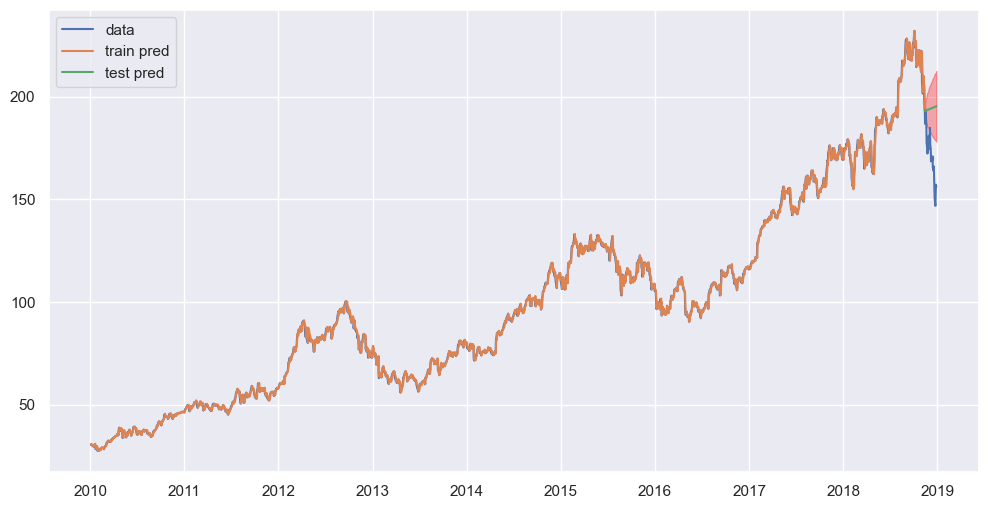

In [14]:
aapl.plot()

train = aapl[:-Ntest]
test = aapl[-Ntest:]

model = pm.auto_arima(train, 
                      error_action='ignore', 
                      surpress_warnings=True,
                      trace=True,
                      maxiter=10,
                      seasonal=False,
                      )

model.summary()

plot_results(model, aapl, train, test)

# ARIMA with IBM

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9442.954, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9436.082, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9437.603, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9437.589, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9434.097, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9439.637, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.673 seconds
RMSE ARIMA: 4.763157130051095
RMSE naive: 4.763157130051095


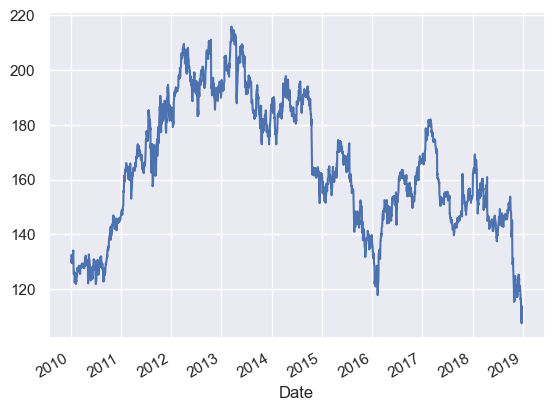

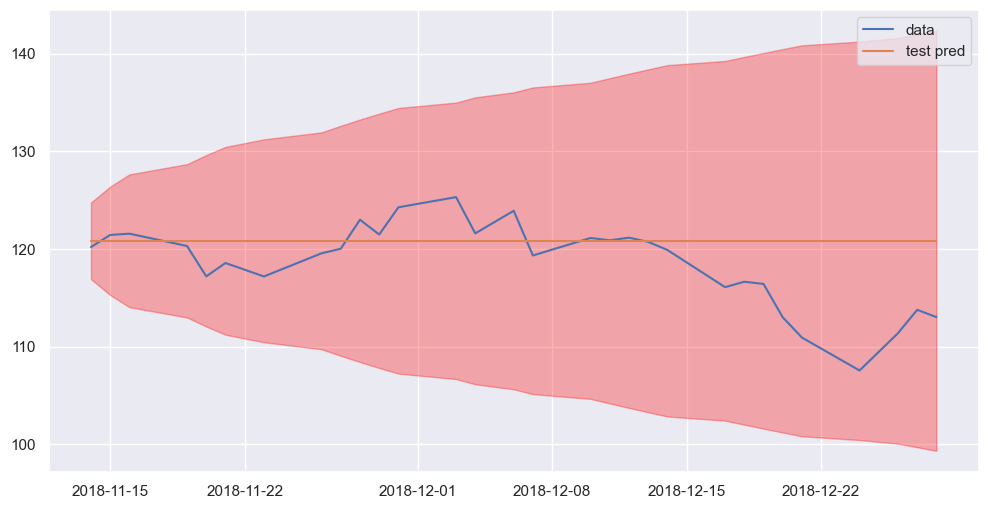

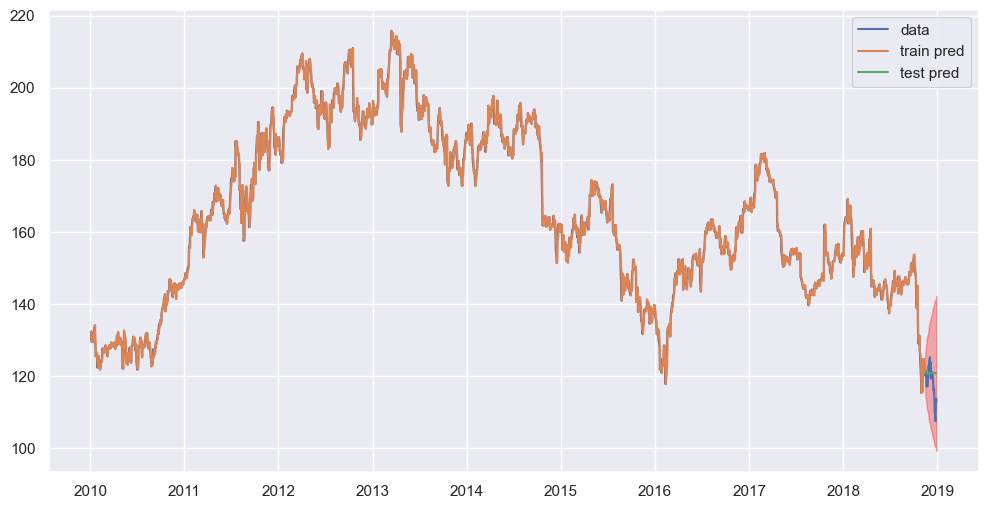

In [15]:
ibm.plot()

train = ibm[:-Ntest]
test = ibm[-Ntest:]

model = pm.auto_arima(train, 
                      error_action='ignore', 
                      surpress_warnings=True,
                      trace=True,
                      maxiter=10,
                      seasonal=False,
                      )

model.summary()

plot_results(model, ibm, train, test)

# ARIMA with Starbux

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3858.919, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3851.895, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3853.862, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3853.860, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3854.154, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3855.861, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.654 seconds
RMSE ARIMA: 3.094903477837591
RMSE naive: 2.6889385763409135


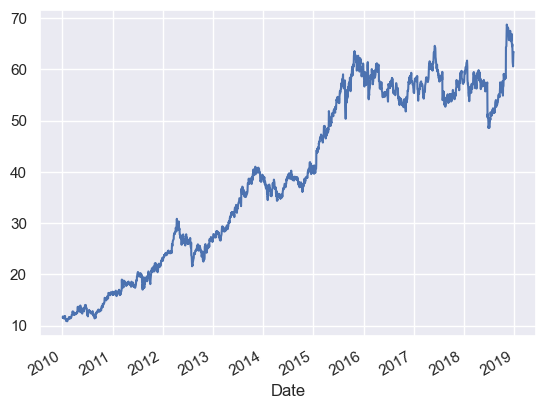

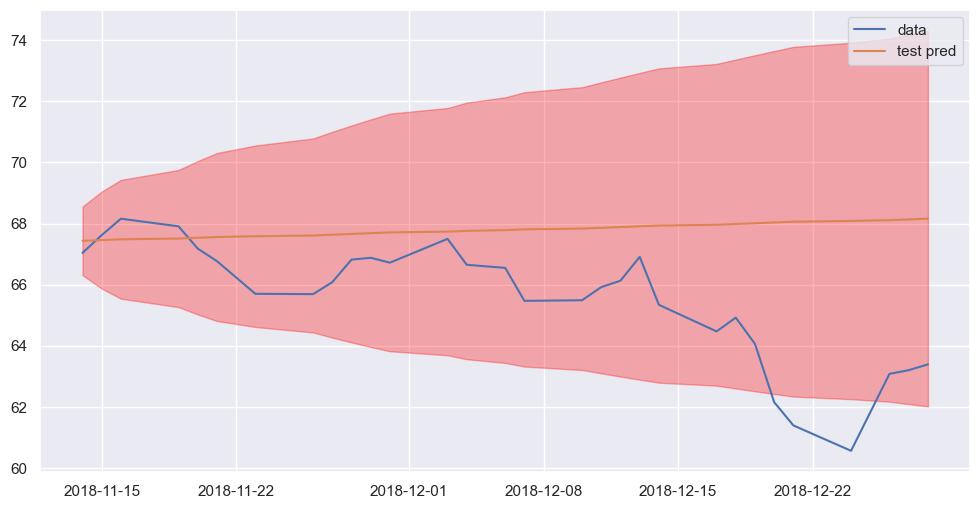

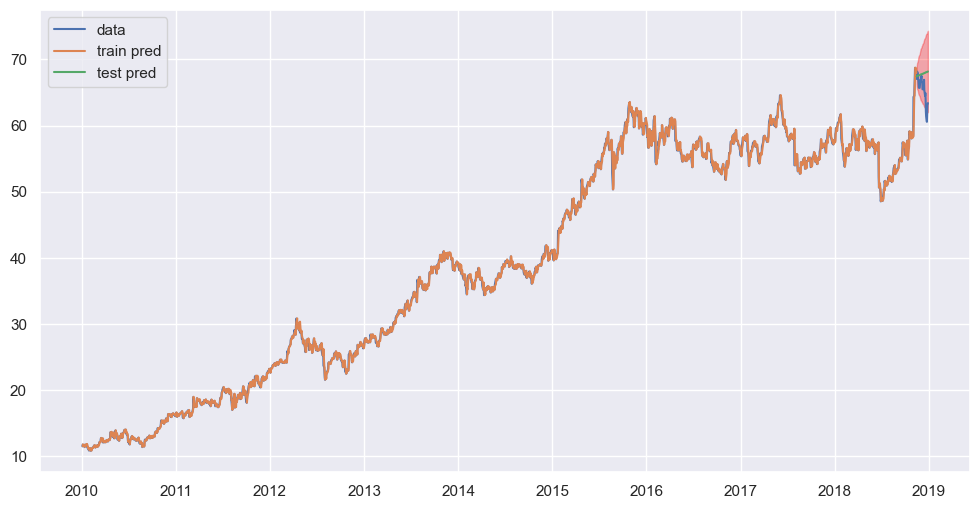

In [16]:
sbux.plot()

train = sbux[:-Ntest]
test = sbux[-Ntest:]

model = pm.auto_arima(train, 
                      error_action='ignore', 
                      surpress_warnings=True,
                      trace=True,
                      maxiter=10,
                      seasonal=False,
                      )

model.summary()

plot_results(model, sbux, train, test)